In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

df.head()
df.describe()

,x,y
count,19.000000,19.000000
mean,44.105263,41.368421
std,18.070525,20.785172
min,12.000000,7.000000
25%,28.500000,23.500000
50%,51.000000,46.000000
75%,55.000000,58.500000
max,72.000000,70.000000


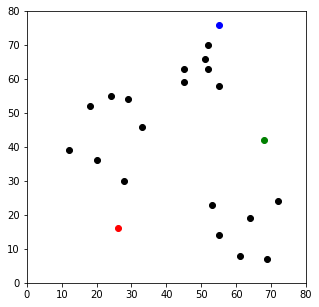

In [3]:
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [5]:
clusters = kmeans.predict(df)
centroids = kmeans.cluster_centers_


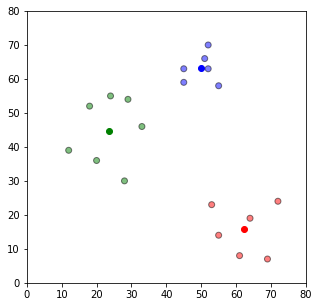

In [6]:
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = [colmap[x+1] for x in clusters]

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [7]:
POINTS = np.array(df)
print(POINTS)

[[12 39]
 [20 36]
 [28 30]
 [18 52]
 [29 54]
 [33 46]
 [24 55]
 [45 59]
 [45 63]
 [52 70]
 [51 66]
 [52 63]
 [55 58]
 [53 23]
 [55 14]
 [61  8]
 [64 19]
 [69  7]
 [72 24]]


In [8]:
class K_meansClustering:
    
    def __init__ (self, POINTS):
        self.POINTS = POINTS

    def calculating_distance(self, x1, x2):
        """
        Calculate distance between points and centroids
        ((x1 - x2)^2 + (y1 - y2)^2) ^ 0.5
        """
        return (sum((x1 - x2)**2))**0.5

    def get_first_centroids(self):
        """
        Return the array of centroid coordinants for the first time
        """

        # get 3 index for centroid coordinants
        index_for_centroids = random.sample(range(len(POINTS)), 3) 

        # get (x, y) coordinant 
        centroids = np.array([POINTS[i] for i in index_for_centroids])
        return centroids

    def find_closest_clusters(self, centroids):
        """
        Get array of centroids.
        Return list wich elements are indexes of centroids.
        """
        closest_points = []
        # to get (x, y) of each point
        for i in POINTS:
            distances = []
            # get (x, y) of each centroid
            for j in centroids:
                # calculade the distance between point and each centroid and add the list
                distance = self.calculating_distance(i, j )
                # the length of list "distance" will be 3
                distances.append(distance)
            # append the index of min value in list
            closest_points.append(np.argmin(distances))
        return closest_points

    def updated_centroids(self, cluster):
        """
        Get list of closest points with value of centroids like [0, 1, 2]
        Create new dataframe (x, y, centroids)
        Count the arithmetic average for x and y
        Return list with updated coordinants for new centroid
        """
        new_centroids = []
        # create new data with x, y and cluster
        new_df = pd.concat([pd.DataFrame(POINTS, columns=["x", "y"]), pd.DataFrame(cluster, columns=["cluster"])], axis=1)
       
        for i in set(new_df["cluster"]):
            # get items from data which equals each cluster and take only x and y columns 
            current_cluster = new_df[new_df["cluster"]==i][new_df.columns[:-1]] 
            # count the average of x and y, wich will be the coordinant of new centroids
            cluster_mean = current_cluster.mean(axis=0)
            new_centroids.append(cluster_mean)
        
        return new_centroids

        # print(new_df.describe())
        # print(new_df.head())

    def k_means(self):
        """
        return the result
        """
        # get first centroid
        first_cen = self.get_first_centroids()
        # get cluster for the first centroid
        clus = self.find_closest_clusters(first_cen)
        # update centroid
        new_cen = self.updated_centroids(clus)
        # repeat the calling methods
        for i in range(20):
            clus = self.find_closest_clusters(new_cen)
            new_cen = self.updated_centroids(clus)

            
        fig = plt.figure(figsize=(5, 5))
        colmap = {1: 'r', 2: 'g', 3: 'b'}
        colors = [colmap[x+1] for x in clus]
        for idx, centroid in enumerate(new_cen):
            plt.scatter(*centroid, color=colmap[idx+1])
        plt.scatter(POINTS[:, 0], POINTS[:, 1], alpha=0.3, color=colors)
        plt.show()




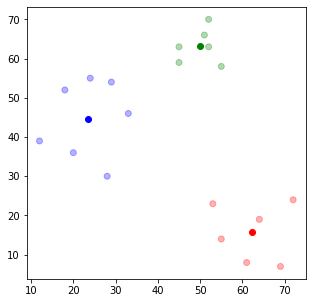

In [9]:
k = K_meansClustering(POINTS)

k.k_means()
   
